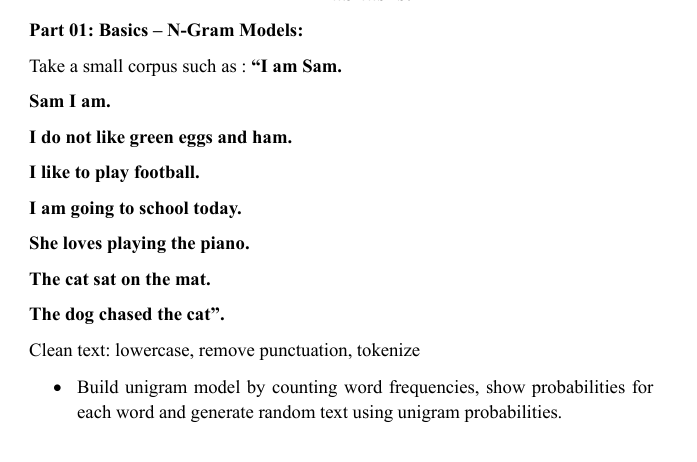

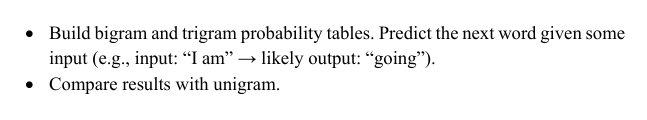

#Language Model VS Large Language Model

| **Aspect**                      | **Language Model (LM)**                                                                                    | **Large Language Model (LLM)**                                                                                         |
| ------------------------------- | ---------------------------------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| **Definition**                  | A model that predicts the next word in a sequence based on the probability of previous words.              | A massively scaled-up neural network trained on vast datasets to understand and generate human-like text.              |
| **Training Type**               | Usually **trained from scratch** on small, specific datasets (like a set of sentences or a custom corpus). | **Pretrained** on huge internet-scale datasets, often with billions of words, and later fine-tuned for specific tasks. |
| **Model Examples**              | N-gram models, RNNs, LSTMs — small models focusing on local context.                                       | GPT, BERT, T5 — transformer-based models with billions of parameters.                                                                    |
| **Example Use Case**            | Predicting next word in “I am ___” within a small dataset.                                                 | Chatbots like ChatGPT, text summarization, translation, and code generation.                                           |


#Import Libraries:

In [ ]:
import random
import re
from collections import Counter, defaultdict



# -----------------------------
# Step 1: Corpus Cleaning
# -----------------------------

In [ ]:

corpus = """I am Sam.
Sam I am.
I do not like green eggs and ham.
I like to play football.
I am going to school today.
She loves playing the piano.
The cat sat on the mat.
The dog chased the cat"""

# Lowercase, remove punctuation, tokenize

In [ ]:

tokens = re.findall(r"\b\w+\b", corpus.lower())

print("Cleaned tokens:", tokens)
print()

# -----------------------------
# Step 2: Unigram Model
# -----------------------------

In [ ]:

unigram_counts = Counter(tokens)
total_tokens = len(tokens)

unigram_probs = {word: count/total_tokens for word, count in unigram_counts.items()}

print("Unigram Probabilities:")
for word, prob in unigram_probs.items():
    print(f"{word}: {prob:.4f}")
print()

# Generate random text (Unigram) - uses sampling

In [ ]:

def generate_unigram(n=10):
    words = list(unigram_probs.keys())
    probs = list(unigram_probs.values())
    return " ".join(random.choices(words, probs, k=n))

print("Random text (Unigram):")
print(generate_unigram(10))
print()

# -----------------------------
# Step 3: Bigram Model
# -----------------------------

In [ ]:

bigram_counts = defaultdict(Counter)
for i in range(len(tokens)-1):
    bigram_counts[tokens[i]][tokens[i+1]] += 1
4
bigram_probs = {w1: {w2: c/sum(next_words.values())
                     for w2, c in next_words.items()}
                for w1, next_words in bigram_counts.items()}

print("Bigram Probabilities (sample):")
for w1, next_words in list(bigram_probs.items())[:5]:
    print(w1, "->", next_words)
print()

# Predict next word using bigram (greedy)

In [ ]:

def predict_bigram(word):
    if word not in bigram_probs:
        return None
    next_words = bigram_probs[word]
    return max(next_words, key=next_words.get)

print("Prediction with Bigram (input='i'):", predict_bigram("i"))
print("Prediction with Bigram (input='am'):", predict_bigram("am"))
print()

# -----------------------------
# Step 4: Trigram Model
# -----------------------------

In [ ]:

trigram_counts = defaultdict(Counter)
for i in range(len(tokens)-2):
    trigram_counts[(tokens[i], tokens[i+1])][tokens[i+2]] += 1

trigram_probs = {context: {w3: c/sum(next_words.values())
                           for w3, c in next_words.items()}
                 for context, next_words in trigram_counts.items()}

print("Trigram Probabilities (sample):")
for context, next_words in list(trigram_probs.items())[:5]:
    print(context, "->", next_words)
print()

# Predict next word using trigram (greedy)

In [ ]:

def predict_trigram(w1, w2):
    if (w1, w2) not in trigram_probs:
        return None
    next_words = trigram_probs[(w1, w2)]
    return max(next_words, key=next_words.get)

print("Prediction with Trigram (input='i am'):", predict_trigram("i", "am"))

Cleaned tokens: ['i', 'am', 'sam', 'sam', 'i', 'am', 'i', 'do', 'not', 'like', 'green', 'eggs', 'and', 'ham', 'i', 'like', 'to', 'play', 'football', 'i', 'am', 'going', 'to', 'school', 'today', 'she', 'loves', 'playing', 'the', 'piano', 'the', 'cat', 'sat', 'on', 'the', 'mat', 'the', 'dog', 'chased', 'the', 'cat']

Unigram Probabilities:
i: 0.1220
am: 0.0732
sam: 0.0488
do: 0.0244
not: 0.0244
like: 0.0488
green: 0.0244
eggs: 0.0244
and: 0.0244
ham: 0.0244
to: 0.0488
play: 0.0244
football: 0.0244
going: 0.0244
school: 0.0244
today: 0.0244
she: 0.0244
loves: 0.0244
playing: 0.0244
the: 0.1220
piano: 0.0244
cat: 0.0488
sat: 0.0244
on: 0.0244
mat: 0.0244
dog: 0.0244
chased: 0.0244

Random text (Unigram):
playing do ham school eggs to am dog am to

Bigram Probabilities (sample):
i -> {'am': 0.6, 'do': 0.2, 'like': 0.2}
am -> {'sam': 0.3333333333333333, 'i': 0.3333333333333333, 'going': 0.3333333333333333}
sam -> {'sam': 0.5, 'i': 0.5}
do -> {'not': 1.0}
not -> {'like': 1.0}

Prediction with

#N-Gram Models

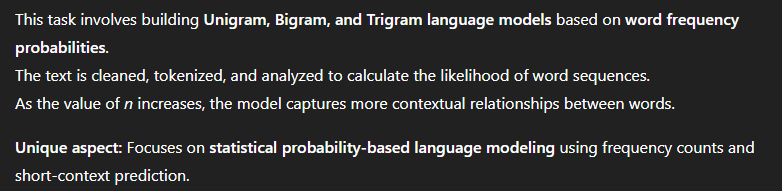

#Unigram Model:
Predicts each word independently based on its overall frequency in the corpus.

#Bigram Model:
Predicts the next word using the immediately preceding word as context.

#Trigram Model:
Predicts the next word using the two previous words to provide better contextual understanding.

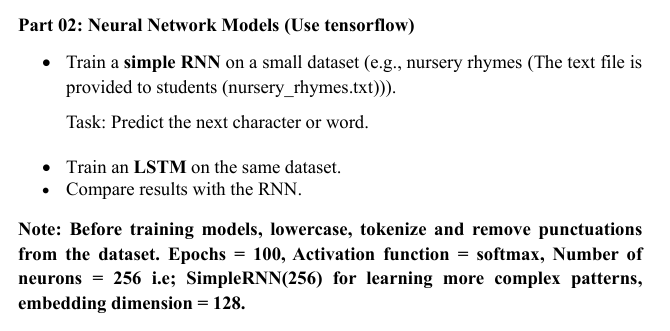

# Create a dummy file with some nursery rhymes content

In [ ]:

with open("nursery_rhymes.txt", "w", encoding="utf-8") as f:
    f.write("""Twinkle, twinkle, little star,
How I wonder what you are.
Up above the world so high,
Like a diamond in the sky.
Twinkle, twinkle, little star,
How I wonder what you are.

Mary had a little lamb,
Its fleece was white as snow.
And everywhere that Mary went,
The lamb was sure to go.

Humpty Dumpty sat on a wall,
Humpty Dumpty had a great fall.
All the king's horses and all the king's men,
Couldn't put Humpty together again.""")

#Import Libraries:

In [ ]:

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
import numpy as np
import re

# ---------------------------------------------------------
# Load and preprocess dataset
# ---------------------------------------------------------
# Load nursery rhymes text

In [ ]:

with open("nursery_rhymes.txt", "r", encoding="utf-8") as f:
    text = f.read().lower()

# Remove punctuations and special characters

In [ ]:

text = re.sub(r'[^a-z\s]', '', text)

# Tokenize words

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Convert text to sequence of integers

In [ ]:
input_sequences = []
words = text.split()

for i in range(2, len(words)):
    seq = words[:i]
    encoded = tokenizer.texts_to_sequences([' '.join(seq)])[0]
    input_sequences.append(encoded)

# Pad sequences to same length

In [ ]:
max_len = max(len(x) for x in input_sequences)
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre'))

# Split features and labels

In [ ]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = to_categorical(y, num_classes=total_words)

In [ ]:

print(f"✅ Data prepared! Vocabulary Size = {total_words}, Sequence Length = {max_len}")


# ---------------------------------------------------------
# Define Simple RNN Model
# ---------------------------------------------------------

In [ ]:

rnn_model = Sequential([
    Embedding(total_words, 128, input_length=X.shape[1]),
    SimpleRNN(256, activation='tanh'),
    Dense(total_words, activation='softmax')
])

rnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\n🚀 Training Simple RNN model (100 epochs)...")
history_rnn = rnn_model.fit(X, y, epochs=100, verbose=1)
print("✅ Simple RNN training complete!")

# ---------------------------------------------------------
#  Define LSTM Model
# ---------------------------------------------------------

In [ ]:
lstm_model = Sequential([
    Embedding(total_words, 128, input_length=X.shape[1]),
    LSTM(256, activation='tanh'),
    Dense(total_words, activation='softmax')
])

lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("\n🚀 Training LSTM model (100 epochs)...")
history_lstm = lstm_model.fit(X, y, epochs=100, verbose=1)
print("✅ LSTM training complete!")


# ---------------------------------------------------------
# Compare Model Performance
# ---------------------------------------------------------

In [ ]:
rnn_loss, rnn_acc = rnn_model.evaluate(X, y, verbose=0)
lstm_loss, lstm_acc = lstm_model.evaluate(X, y, verbose=0)

print("\n📊 MODEL COMPARISON:")
print(f"Simple RNN → Accuracy: {rnn_acc:.4f}, Loss: {rnn_loss:.4f}")
print(f"LSTM       → Accuracy: {lstm_acc:.4f}, Loss: {lstm_loss:.4f}")

# ---------------------------------------------------------
# Generate Next Word Prediction Function
# ---------------------------------------------------------

In [ ]:
def predict_next_word(model, tokenizer, seed_text, max_sequence_len):
    text = seed_text.lower()
    for _ in range(5):  # predict next 5 words
        encoded = tokenizer.texts_to_sequences([text])[0]
        encoded = pad_sequences([encoded], maxlen=max_sequence_len - 1, padding='pre')
        predicted = np.argmax(model.predict(encoded, verbose=0))
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                text += ' ' + word
                break
    return text

# Example predictions

In [ ]:

seed = "twinkle twinkle"
print("\n✨ RNN prediction:", predict_next_word(rnn_model, tokenizer, seed, max_len))
print("✨ LSTM prediction:", predict_next_word(lstm_model, tokenizer, seed, max_len))


✅ Data prepared! Vocabulary Size = 52, Sequence Length = 79

🚀 Training Simple RNN model (100 epochs)...
Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 94ms/step - accuracy: 0.0103 - loss: 3.9518
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.2284 - loss: 3.6642
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.5700 - loss: 3.3163
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.5552 - loss: 3.0950
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7108 - loss: 2.8553
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.7510 - loss: 2.5392
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8126 - loss: 2.3719
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.8268 - loss: 2.0936
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8823 - loss: 1.8450
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.9200 - loss: 1.5828
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - 

#Explanation:

1.This task trains neural network-based models on text data using TensorFlow.


2.A Simple RNN is implemented to learn short-term word dependencies, followed by an LSTM model to capture long-term context through its memory gates.


3.Both models aim to predict the next word or character based on learned patterns.


#Unique aspect:
Introduces deep learning for language modeling, allowing the model to learn context automatically instead of relying on statistical counts.

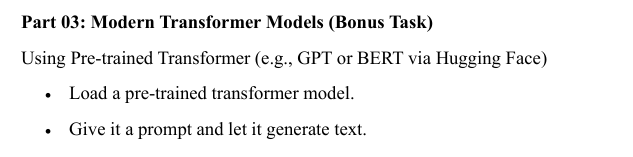

In [ ]:
from transformers import pipeline
unmasker = pipeline('fill-mask', model='bert-base-uncased')
unmasker("Twinkle twinkle [MASK] star.")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


[{'score': 0.44585758447647095,
  'token': 2210,
  'token_str': 'little',
  'sequence': 'twinkle twinkle little star.'},
 {'score': 0.11427944153547287,
  'token': 29038,
  'token_str': 'twinkle',
  'sequence': 'twinkle twinkle twinkle star.'},
 {'score': 0.0911245048046112,
  'token': 1010,
  'token_str': ',',
  'sequence': 'twinkle twinkle, star.'},
 {'score': 0.0819026306271553,
  'token': 1996,
  'token_str': 'the',
  'sequence': 'twinkle twinkle the star.'},
 {'score': 0.06745883077383041,
  'token': 2026,
  'token_str': 'my',
  'sequence': 'twinkle twinkle my star.'}]

#Explanation:

1.This task utilizes a pretrained transformer model (e.g., BERT) to generate text from a given prompt.

2.The transformer uses self-attention mechanisms to understand complete sentence context and produce fluent, meaningful text.

#Unique aspect:
Demonstrates transfer learning with a pretrained large language model, capable of performing multiple NLP tasks without additional training.